In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('Titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_=data.drop(['Name','PassengerId','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns')

In [5]:
data_

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
data_sex=LabelEncoder()

In [8]:
data_['sex']=data_sex.fit_transform(data_['Sex'])

In [10]:
data_.drop('Sex',axis=1)

,Survived,Pclass,Age,Fare,sex
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1
...,...,...,...,...,...
886,0,2,27.0,13.0000,1
887,1,1,19.0,30.0000,0
888,0,3,NaN,23.4500,0
889,1,1,26.0,30.0000,1


In [11]:
data_.head()

,Survived,Pclass,Sex,Age,Fare,sex
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1


In [12]:
import seaborn as sns

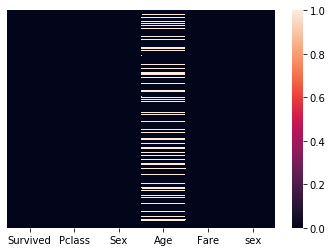

In [16]:
sns.heatmap(data_.isnull(),yticklabels=False)

In [17]:
data_['Age'].mean()

29.69911764705882

In [18]:
data_['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [20]:
data_['Age'].isnull().sum()

177

In [23]:
data_.count()

Survived    891
Pclass      891
Sex         891
Age         714
Fare        891
sex         891
dtype: int64

In [27]:
data_['Age'].fillna(data_['Age'].mean(),inplace=True)

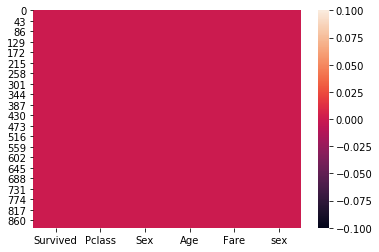

In [28]:
sns.heatmap(data_.isnull())

In [29]:
data_.head()

,Survived,Pclass,Sex,Age,Fare,sex
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1


In [31]:
data_.drop('Sex',axis=1,inplace=True)

In [37]:
data_.head()

,Survived,Pclass,Age,Fare,sex
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


In [34]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [36]:
X_train,X_test,y_train,y_test=train_test_split(data_.drop('Survived',axis=1),data_['Survived'],test_size=0.3,random_state=42)

In [38]:
model=tree.DecisionTreeClassifier()

In [39]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
m_score=model.score(X_test,y_test)

In [48]:
m_score*100

75.3731343283582

In [43]:
X_test

,Pclass,Age,Fare,sex
709,3,29.699118,15.2458,1
439,2,31.000000,10.5000,1
840,3,20.000000,7.9250,1
720,2,6.000000,33.0000,0
39,3,14.000000,11.2417,0
...,...,...,...,...
821,3,27.000000,8.6625,1
633,1,29.699118,0.0000,1
456,1,65.000000,26.5500,1
500,3,17.000000,8.6625,1


In [47]:
model.predict([[2,6.000000,33.0000,0]])

array([1], dtype=int64)

In [45]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
821    1
633    0
456    0
500    0
430    1
Name: Survived, Length: 268, dtype: int64